In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use("CMS")
hep.style.use(hep.style.CMS)

In [2]:
data_directory = "/home/ryan/"
file_name = "reco_gamma_log10continuous_200GeV-300GeV_theta_0.0deg-0.3deg_000.edm4hep.root"
include_ecal = True
with ur.open("{file}:events".format(file=data_directory+file_name)) as events:
    MC = events.arrays(["MCParticles.generatorStatus", "MCParticles.PDG",'MCParticles.mass',
                            'MCParticles.momentum.x', 'MCParticles.momentum.y', 'MCParticles.momentum.z', 'MCParticles.endpoint.z', 
                            'MCParticles.vertex.x', 'MCParticles.vertex.y', 'MCParticles.vertex.z'])
    if include_ecal:
        reco = events.arrays(["ZDCEcalHitsReco.energy", "ZDCEcalHitsReco.time", "ZDCEcalHitsReco.position.x", "ZDCEcalHitsReco.position.y", "ZDCEcalHitsReco.position.z",
                              "ZDCHcalHitsReco.energy", "ZDCHcalHitsReco.time", "ZDCHcalHitsReco.position.x", "ZDCHcalHitsReco.position.y", "ZDCHcalHitsReco.position.z"])
    else:
        reco = events.arrays(["ZDCHcalHitsReco.energy", "ZDCHcalHitsReco.time", "ZDCHcalHitsReco.position.x", "ZDCHcalHitsReco.position.y", "ZDCHcalHitsReco.position.z"])
    print("Number of events:",events.num_entries)

Number of events: 100


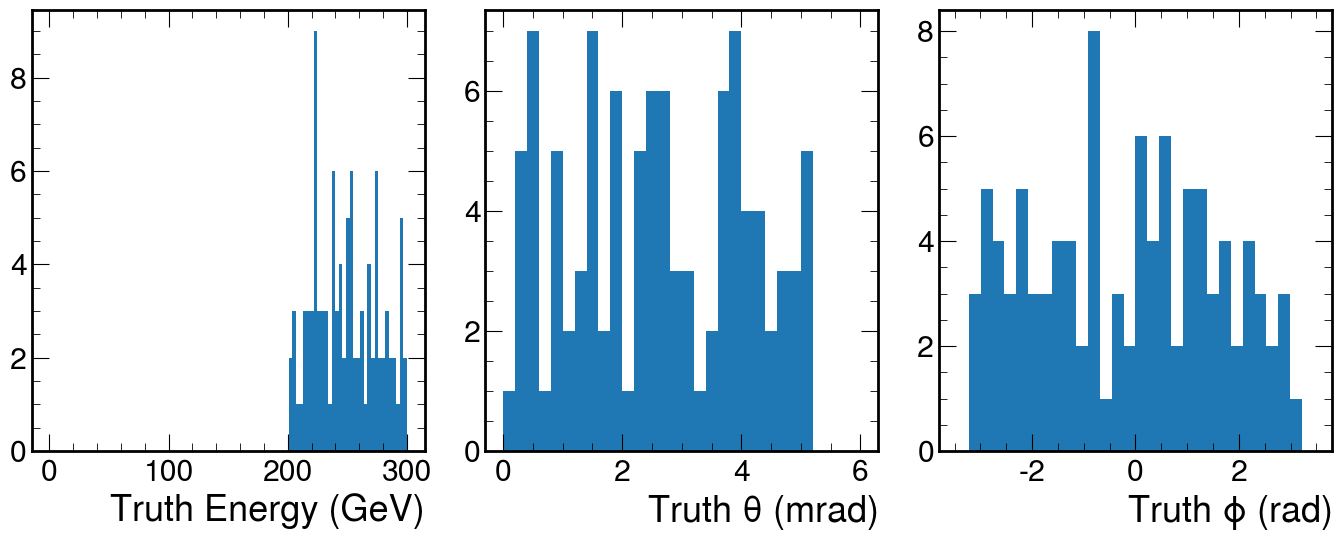

In [3]:
# Mask to get incident final state information
final_state_mask = (MC["MCParticles.generatorStatus"]==1)
# Getting the momentum in different directions and mass of the final states
px = MC["MCParticles.momentum.x"][final_state_mask]
py = MC["MCParticles.momentum.y"][final_state_mask]
pz = MC["MCParticles.momentum.z"][final_state_mask]
mass = MC["MCParticles.mass"][final_state_mask]

# Calculating the neutron's energy and the angles it was fired at
momentum = np.sqrt(px**2 + py**2 + pz**2)
energy = np.sqrt(momentum**2 + mass**2) # Units = GeV
theta = np.arccos(pz/momentum) # Units = radians
phi = np.arctan2(py, px) # Units = radians

# Plotting the neutron energy & angles
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(14,6))

ax1.hist(ak.flatten(momentum), bins = 100, range = [0, 300], histtype='stepfilled')
ax1.set_xlabel("Truth Energy (GeV)")
ax2.hist(ak.flatten(theta)*1000, bins = 30, range=[0, 6], histtype='stepfilled')
ax2.set_xlabel("Truth $\\theta$ (mrad)")

ax3.hist(ak.flatten(phi), bins = 30, range=[-1.1*np.pi, 1.1*np.pi], histtype='stepfilled')
ax3.set_xlabel("Truth $\phi$ (rad)")

plt.tight_layout()

Text(0.5, 1.0, 'ZDC HCal')

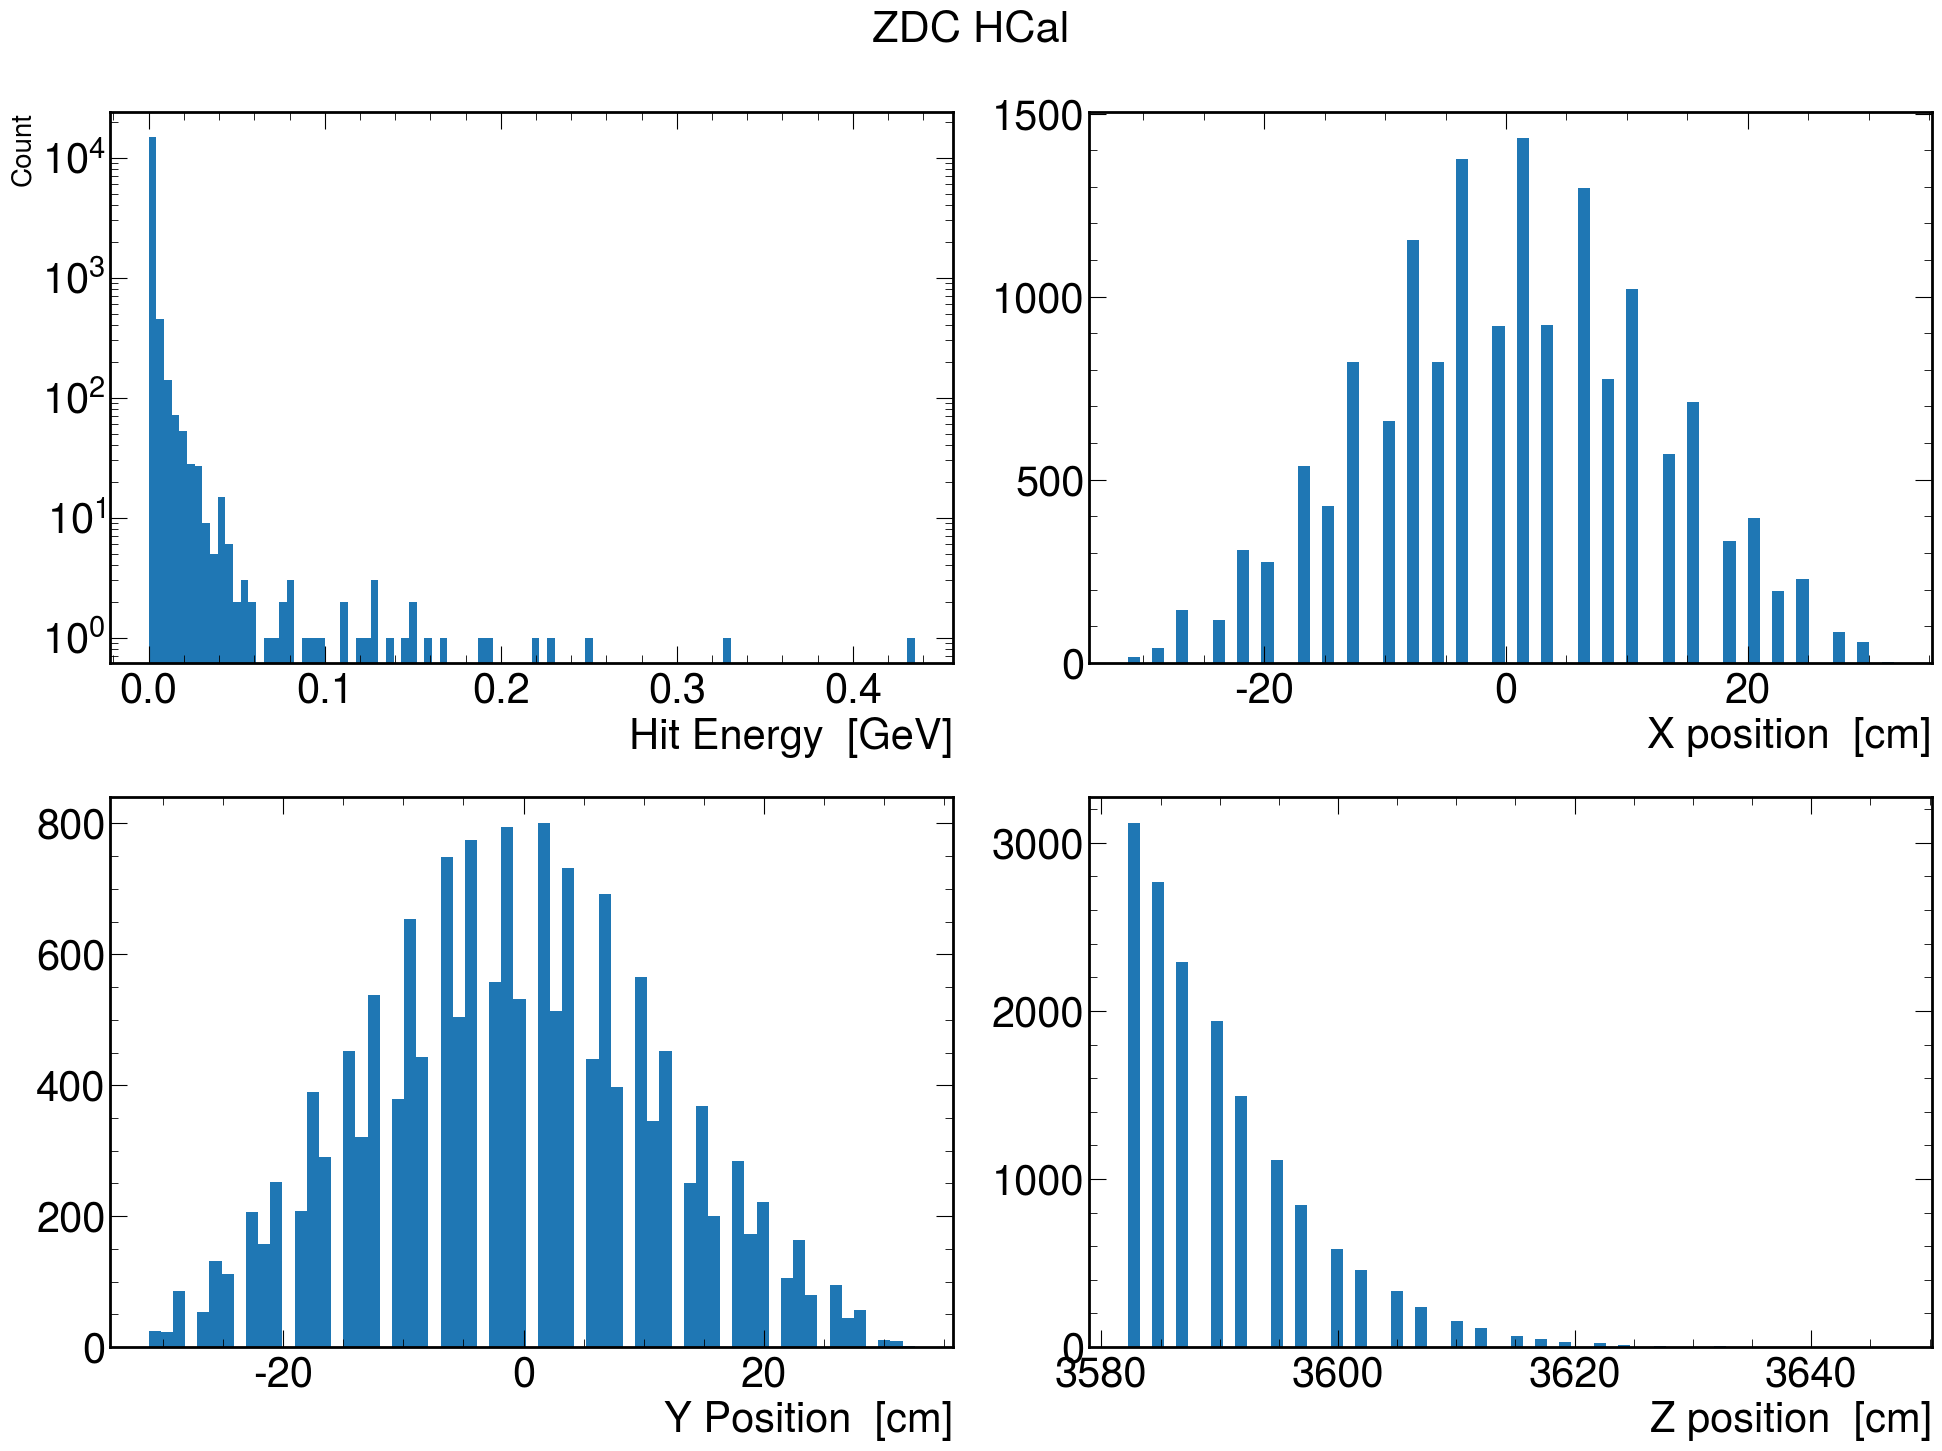

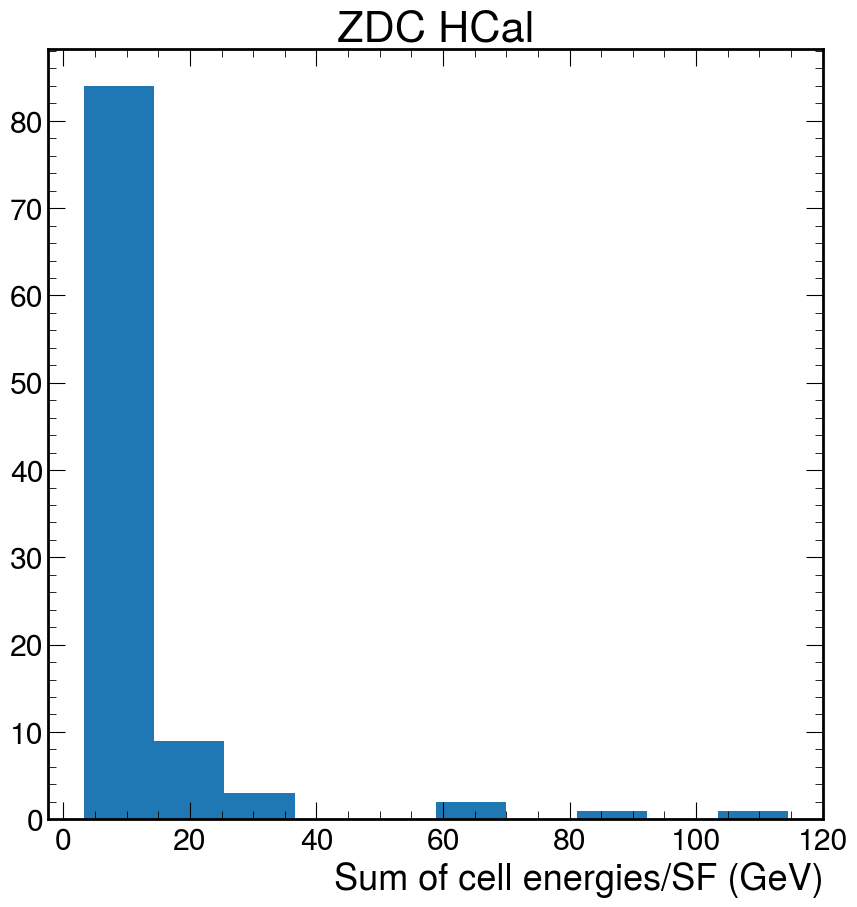

In [4]:
nrows=2
ncols=2
zdc_cell_energies = reco["ZDCHcalHitsReco.energy"]
zdc_cell_times = reco["ZDCHcalHitsReco.time"]
zdc_x_pos = reco["ZDCHcalHitsReco.position.x"]
zdc_y_pos = reco["ZDCHcalHitsReco.position.y"]
zdc_z_pos = reco["ZDCHcalHitsReco.position.z"]

fig2, ax2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
variables=[zdc_cell_energies, zdc_x_pos, zdc_y_pos, zdc_z_pos]
titles=['Hit Energy','X position', 'Y Position', 'Z position']
for index, (variable, title) in enumerate(zip(variables, titles)):
    irow=int(index/nrows)
    icol=index%ncols
    min_range=np.min(ak.flatten(variable))
    max_range=np.max(ak.flatten(variable))
    
    if index==0:
        ax2[irow, icol].set_ylabel("Count", fontsize=20)
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [GeV]", fontsize=30)
        ax2[irow, icol].set_yscale('log')
        nbins=100
        ax2[irow, icol].hist(ak.flatten(variable), bins=nbins, histtype='stepfilled', linewidth=3)
    else:    
        nbins=int((max_range-min_range)/10.0) 
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [cm]", fontsize=30)
        ax2[irow, icol].hist(ak.flatten(variable)/10, bins=nbins, histtype='stepfilled', linewidth=3)
    
    
    ax2[irow, icol].yaxis.set_tick_params(labelsize=30)
    ax2[irow, icol].xaxis.set_tick_params(labelsize=30)
plt.subplots_adjust(wspace=0.3, hspace=0.2)    
plt.suptitle("ZDC HCal")
plt.tight_layout()
fig = plt.figure()
plt.hist(ak.sum(zdc_cell_energies, axis=1)/.02)
plt.xlabel("Sum of cell energies/SF (GeV)")
plt.title("ZDC HCal")

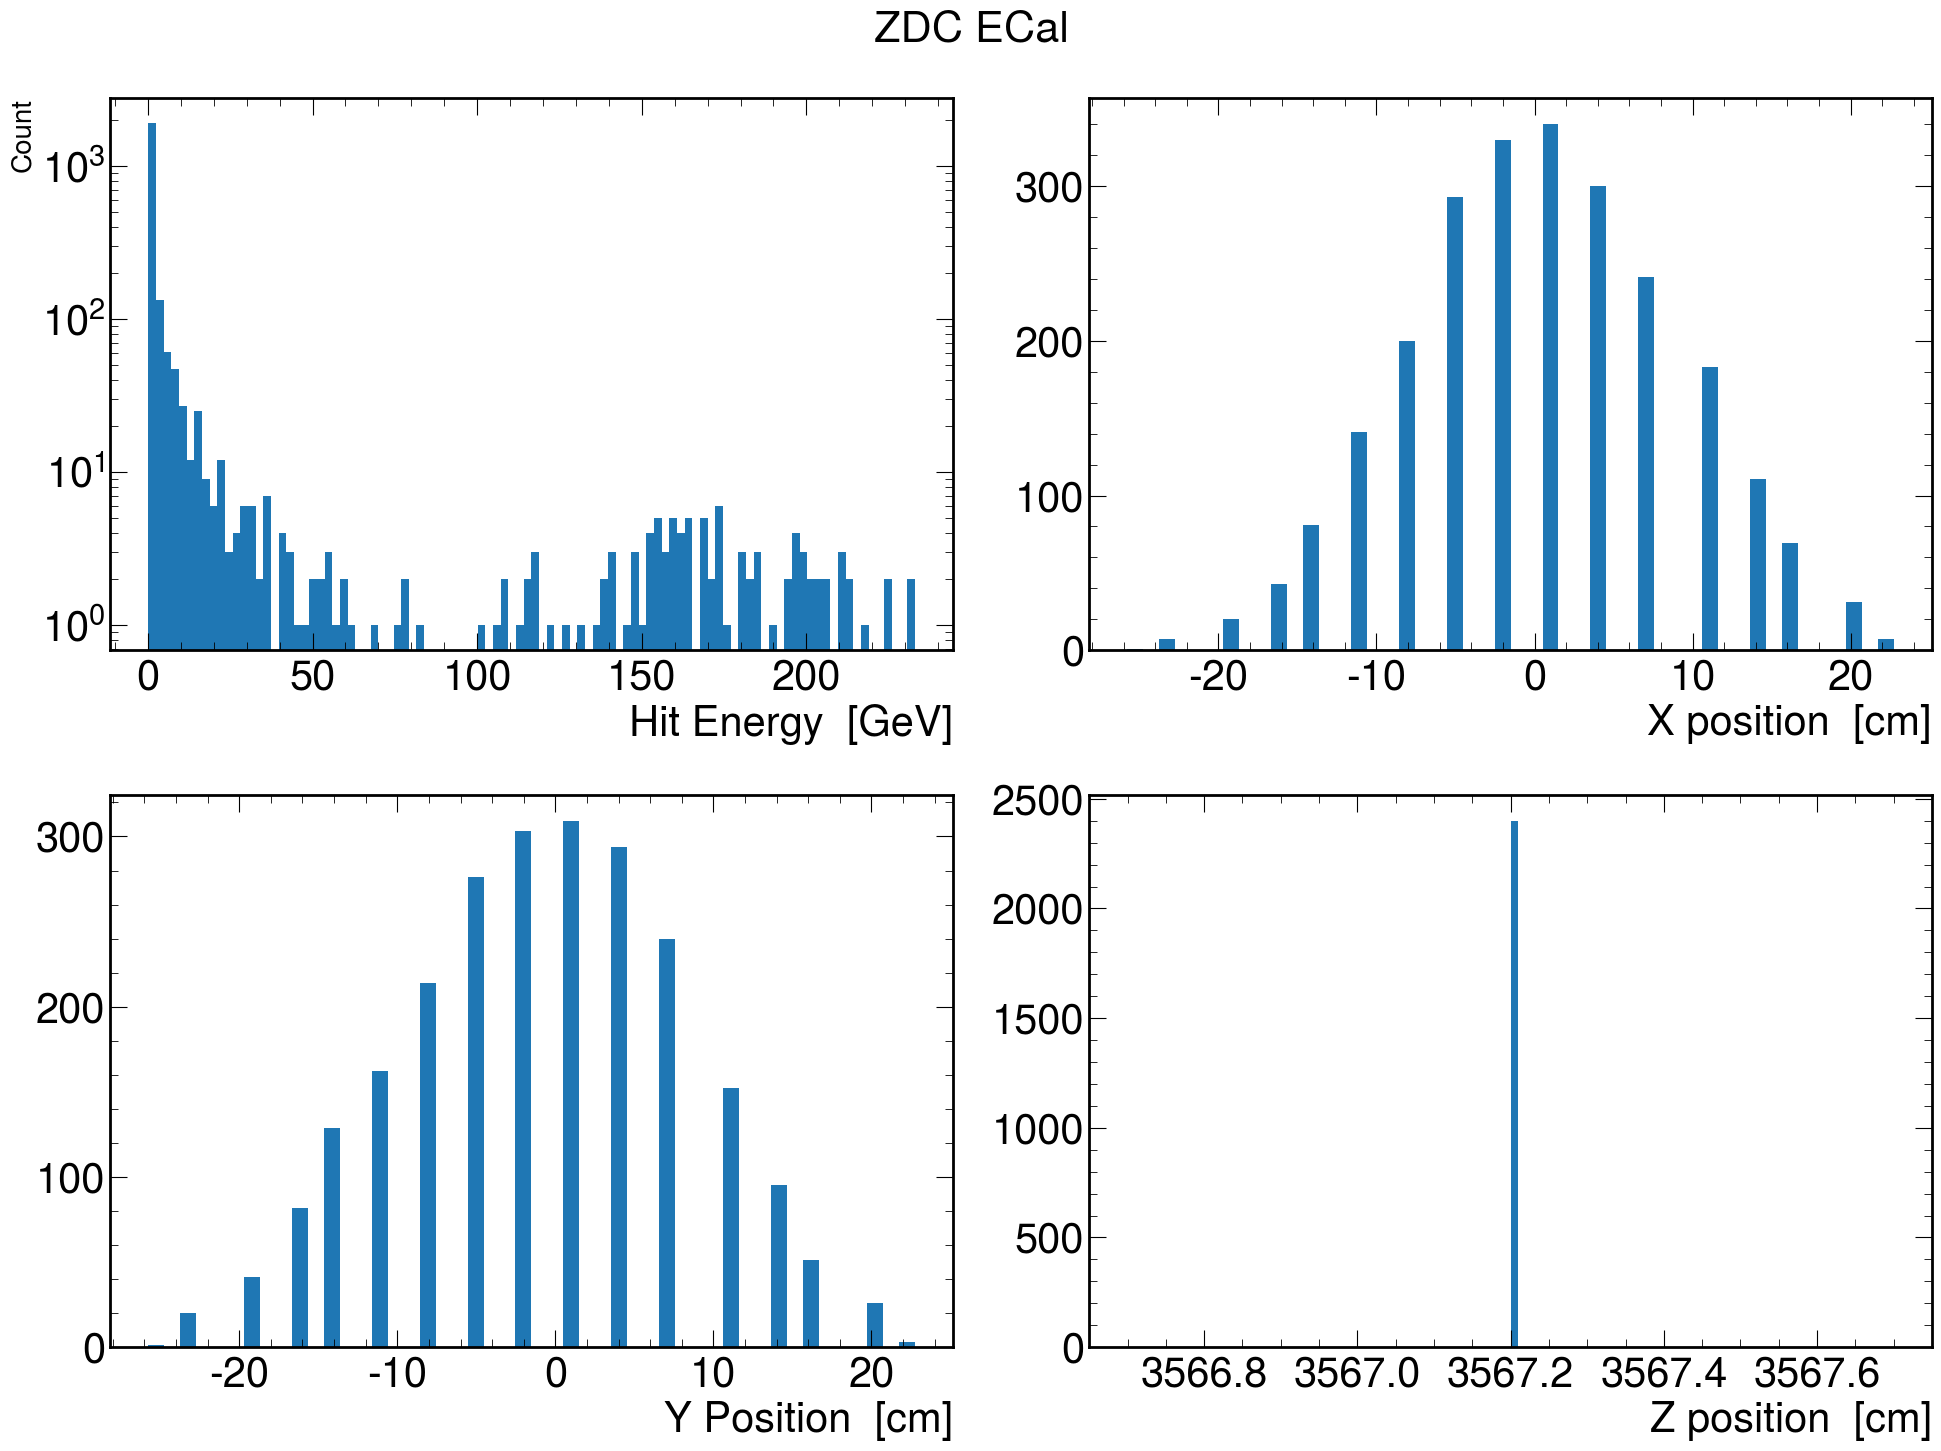

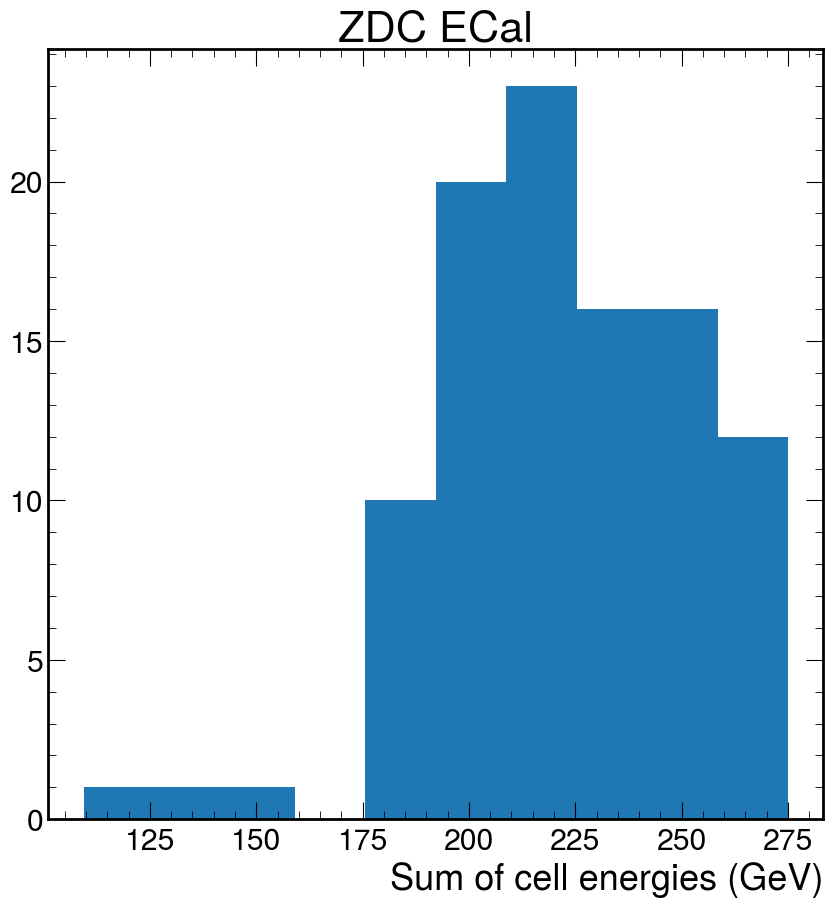

In [5]:
if include_ecal:
    nrows=2
    ncols=2
    ecal_cell_energies = reco["ZDCEcalHitsReco.energy"]
    ecal_cell_times = reco["ZDCEcalHitsReco.time"]
    ecal_x_pos = reco["ZDCEcalHitsReco.position.x"]
    ecal_y_pos = reco["ZDCEcalHitsReco.position.y"]
    ecal_z_pos = reco["ZDCEcalHitsReco.position.z"]

    fig2, ax2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
    variables=[ecal_cell_energies, ecal_x_pos, ecal_y_pos, ecal_z_pos]
    titles=['Hit Energy','X position', 'Y Position', 'Z position']
    for index, (variable, title) in enumerate(zip(variables, titles)):
        irow=int(index/nrows)
        icol=index%ncols
        min_range=np.min(ak.flatten(variable))
        max_range=np.max(ak.flatten(variable))

        if index==0:
            ax2[irow, icol].set_ylabel("Count", fontsize=20)
            ax2[irow, icol].set_xlabel(f"{titles[index]}  [GeV]", fontsize=30)
            ax2[irow, icol].set_yscale('log')
            nbins=100
            ax2[irow, icol].hist(ak.flatten(variable), bins=nbins, histtype='stepfilled', linewidth=3)
        else:    
            nbins=int((max_range-min_range)/10.0) 
            ax2[irow, icol].set_xlabel(f"{titles[index]}  [cm]", fontsize=30)
            if nbins == 0:
                nbins = 100
            ax2[irow, icol].hist(ak.flatten(variable)/10, bins=nbins, histtype='stepfilled', linewidth=3)

        ax2[irow, icol].yaxis.set_tick_params(labelsize=30)
        ax2[irow, icol].xaxis.set_tick_params(labelsize=30)
    plt.subplots_adjust(wspace=0.3, hspace=0.2)    
    plt.suptitle("ZDC ECal")
    plt.tight_layout()
    fig = plt.figure()
    plt.hist(ak.sum(ecal_cell_energies, axis=1))
    plt.xlabel("Sum of cell energies (GeV)")
    plt.title("ZDC ECal")

Text(0, 1, 'Reconstructed energy (GeV)')

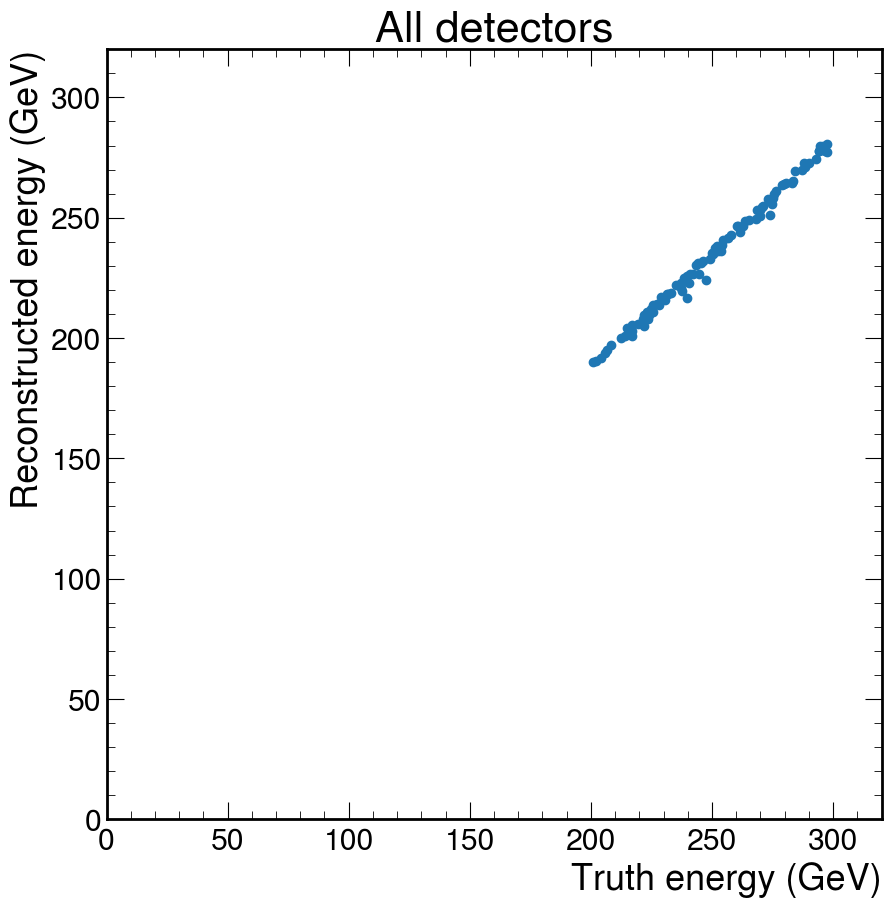

In [6]:
reco_energy = ak.sum(zdc_cell_energies, axis=1)/.02+ak.sum(ecal_cell_energies, axis=1)
plt.scatter(ak.flatten(energy), reco_energy)
plt.ylim(0,320)
plt.xlim(0,320)
plt.title("All detectors")
plt.xlabel("Truth energy (GeV)")
plt.ylabel("Reconstructed energy (GeV)")